In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [69]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()

In [70]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [71]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [72]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [73]:
df['price']=data.target

In [74]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
df.shape

(20640, 9)

In [76]:
#here the data is too long so it will be take  much time so i  have to take a samole of the data  to predicit the data 
#fraction of the data  is 20%
df=df.sample(frac=0.20)


In [77]:
df.shape

(4128, 9)

In [78]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [79]:
df.shape

(4128, 9)

In [80]:
#now ia have to do train test splict 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [86]:
#i  have to do decision tree regressor so 
from sklearn.tree import DecisionTreeRegressor
regress=DecisionTreeRegressor()
regress.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [87]:
ypred=regress.predict(x_test)

In [88]:
ypred

array([1.44 , 1.452, 0.907, ..., 1.759, 3.243, 2.345], shape=(1239,))

In [92]:
from sklearn.metrics import r2_score
r2_score(ypred,y_test)

0.543538737763527

#now i am going to do hyperparameter tuning in this regressor 


In [93]:
param={
    'criterion': ['squared_error','absolute_error','friedman_mse'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,10],
    'max_features':['auto','sqrt','log2']
    
}

In [95]:
regress= DecisionTreeRegressor()

In [98]:
from sklearn.model_selection import GridSearchCV
ghypertun=GridSearchCV(regress,param_grid=param,cv=5,scoring='neg_mean_squared_error',verbose=2)

In [99]:
ghypertun.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_err

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [100]:
ghypertun.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [102]:
final_model=DecisionTreeRegressor(criterion='absolute_error',max_depth= 10,max_features= 'log2',splitter= 'best')

In [103]:
final_model.fit(x_train,y_train)

,criterion,'absolute_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.657679546310241, 0.9545454545454546, 'x[6] <= 38.465\nabsolute_error = 0.88\nsamples = 2889\nvalue = 1.798'),
 Text(0.42973456325301207, 0.8636363636363636, 'x[0] <= 4.993\nabsolute_error = 0.896\nsamples = 2573\nvalue = 1.902'),
 Text(0.5437070547816265, 0.9090909090909092, 'True  '),
 Text(0.22644484186746988, 0.7727272727272727, 'x[0] <= 2.734\nabsolute_error = 0.665\nsamples = 1948\nvalue = 1.644'),
 Text(0.09897402108433735, 0.6818181818181818, 'x[5] <= 2.411\nabsolute_error = 0.517\nsamples = 736\nvalue = 1.168'),
 Text(0.036897590361445784, 0.5909090909090909, 'x[2] <= 4.521\nabsolute_error = 0.606\nsamples = 184\nvalue = 1.5'),
 Text(0.017695783132530122, 0.5, 'x[4] <= 1573.5\nabsolute_error = 0.655\nsamples = 105\nvalue = 1.705'),
 Text(0.008283132530120483, 0.4090909090909091, 'x[0] <= 0.862\nabsolute_error = 0.58\nsamples = 92\nvalue = 1.614'),
 Text(0.0030120481927710845, 0.3181818181818182, 'x[0] <= 0.695\nabsolute_error = 0.75\nsamples = 2\nvalue = 4.25'),
 Text(0

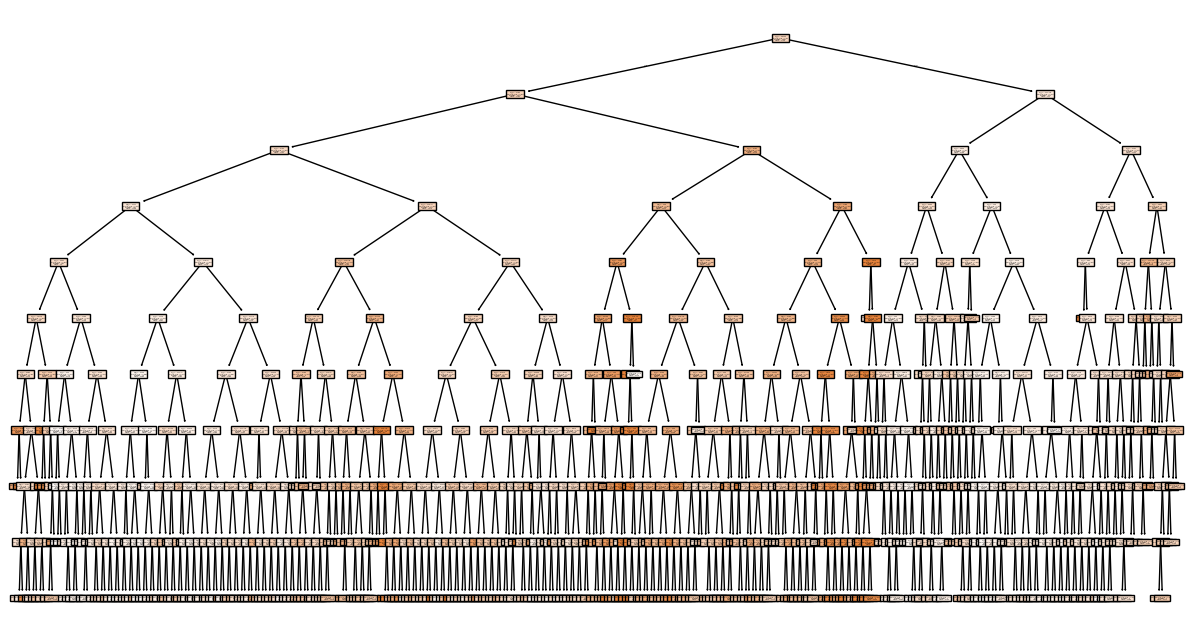

In [111]:
#from visualization
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(final_model,filled = True)